In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from tqdm import tqdm
import os

from P3_helpers import *

In [2]:
# Load data
df = get_dataframe()
df_vote_evolution = get_timeserie_df(df)
df_vote_evolution.sample(5)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,Vote_number
116665,Anetode,Hex,1,-1.0,2007.0,2007-03-27 20:23:00,"'''Support''' - more of a symbolic gesture, re...",2,5.333333,24
7715,Calabe1992,GabeMc,-1,-1.0,2012.0,2012-04-27 14:11:00,I must also '''Oppose''' due to the remark reg...,1,11.116667,18
16651,Thecheesykid,E2eamon,1,-1.0,2011.0,2011-07-05 20:38:00,'''Support''' - user is very competent. ''',1,1.416667,5
119136,Bakasuprman,MER-C,1,-1.0,2007.0,2007-02-03 22:47:00,'''Support''' - A user that would definitely u...,2,11.266667,31
178974,Boothy443,K1Bond007,-1,1.0,2005.0,2005-08-14 10:18:00,--,1,38.350000,14


In [3]:
# Create folder for plots
if not os.path.exists('Figures'):
    os.makedirs('Figures')

# Quantity of votes through time

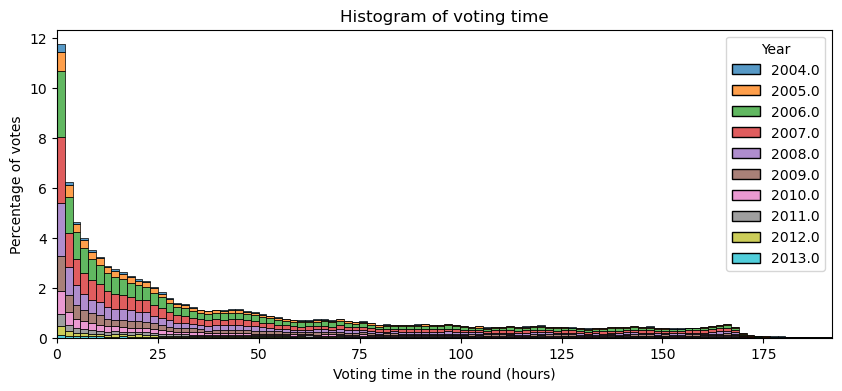

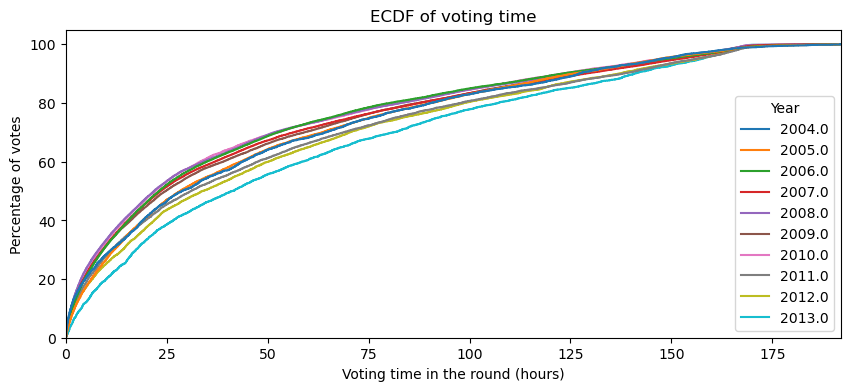

In [4]:
# Distribution of votes in round of election
pdf_voting_time(df_vote_evolution)
cdf_voting_time(df_vote_evolution)

# Evolution of votes proportions through time

In [5]:
df_vote_evolution = get_progressive_mean(df_vote_evolution)
df_vote_evolution.sample(5)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,Vote_number,progressive_mean
148066,Mhking,Silence,1,1.0,2006.0,2006-06-07 16:46:00,"'''Support''', per nomination. --",2,0 days 03:01:59.999999998,12,1.000000
155278,Wikipediarules2221,Bornhj,0,-1.0,2006.0,2006-08-11 03:22:00,'''Reluctant neutral''' per above.,1,1 days 12:34:00.000000001,28,0.107143
21817,JamieS93,Floquenbeam,1,1.0,2010.0,2010-01-12 16:53:00,Absolutely. Xeno said exactly what I was think...,1,0 days 00:10:59.999999998,6,1.000000
183915,CJLL Wright,Shanel,1,1.0,2005.0,2005-12-12 23:30:00,"'''Support''', a few teething errors easily ou...",3,2 days 17:42:00,22,1.000000
121388,Xoloz,Retiono Virginian,-1,-1.0,2007.0,2007-04-26 20:55:00,'''Oppose''' I absolutely trust the good-faith...,1,0 days 01:34:59.999999998,10,-0.400000


#### Tendencies, center and dispersion

In [6]:
# Moving average of the progressive mean by filtering the data with a window of 1 hour
rolling_avg = df_vote_evolution.groupby(['Results', pd.Grouper(key='Voting_time', freq='1h', origin='start')])

# Compute the median, first and last quartile
quartiles = get_quartiles(rolling_avg, 'Voting_time')

# Compute the mean and 95% confidence interval
sem = get_confidence_interval(rolling_avg, 'Voting_time')

# Display the results
display(quartiles.sample(5))
display(sem.sample(5))

,Results,Voting_time,lower,center,upper
40,-1.0,40.0,-0.013393,0.256777,0.464909
470,1.0,256.0,0.437500,0.448980,0.460000
56,-1.0,56.0,0.042821,0.269048,0.473506
229,1.0,9.0,0.882353,1.000000,1.000000
435,1.0,246.0,0.178947,0.200000,0.219048


,Results,Voting_time,center,sem,lower,upper
569,1.0,442.0,1.000000,0.000000,1.000000,1.000000
562,1.0,405.0,0.405978,0.194022,0.025696,0.786261
305,1.0,85.0,0.866763,0.008212,0.850667,0.882860
34,-1.0,34.0,0.203653,0.018912,0.166587,0.240720
489,1.0,275.0,0.408602,NaN,NaN,NaN


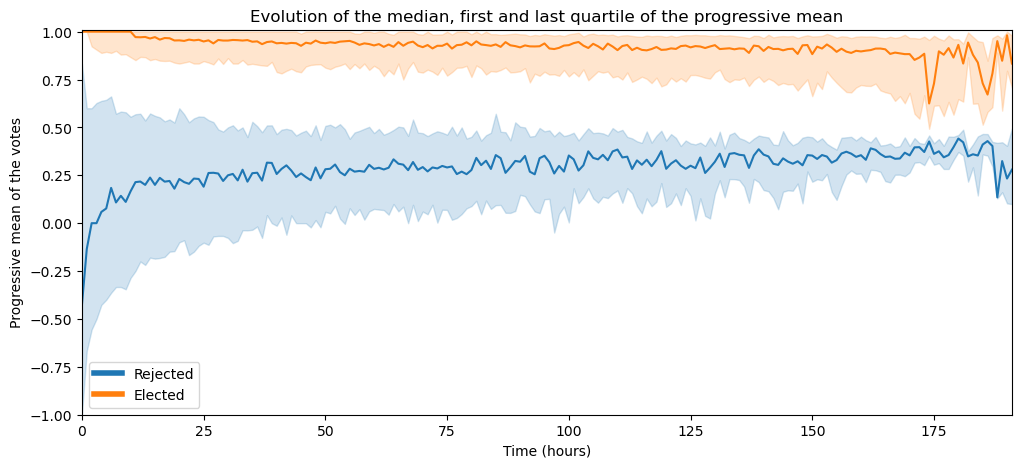

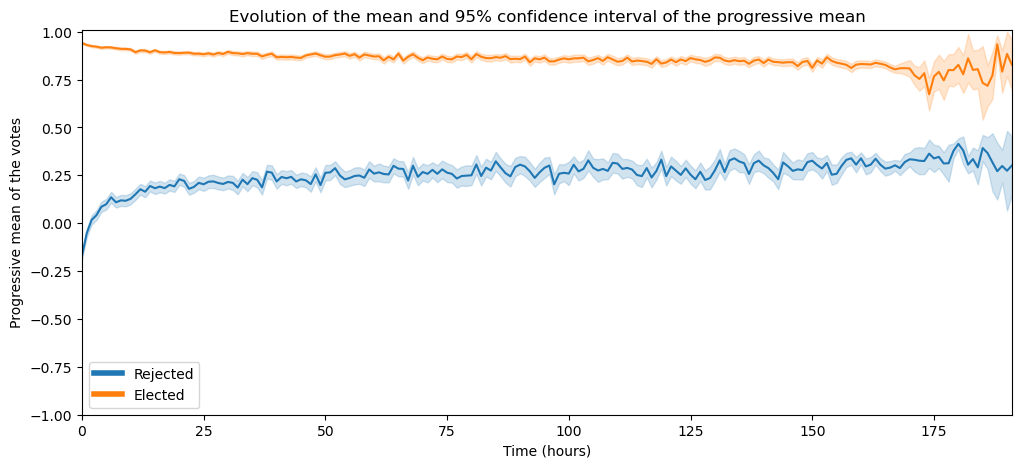

In [7]:
# Plot the evolution of the median, first and last quartile of the progressive mean
ax = plot_vote_evolution(quartiles, 'Voting_time')
ax.set_title('Evolution of the median, first and last quartile of the progressive mean')
plt.savefig('Figures/median_quartiles_over_time.png')
plt.show()

# Plot the evolution of the mean and 95% confidence interval of the progressive mean
ax = plot_vote_evolution(sem, 'Voting_time')
ax.set_title('Evolution of the mean and 95% confidence interval of the progressive mean')
plt.savefig('Figures/mean_ci_over_time.png')
plt.show()


In [8]:
# Election evolution by vote number
vote_nb = df_vote_evolution.groupby(['Results', 'Vote_number'])
# Compute the median, first and last quartile
quartiles = get_quartiles(vote_nb, 'Vote_number')

# Compute the mean and 95% confidence interval
sem = get_confidence_interval(vote_nb, 'Vote_number')

# Display the results
display(quartiles.sample(5))
display(sem.sample(5))

,Results,Vote_number,lower,center,upper,Voting_time
380,1.0,104,0.740385,0.903846,0.980769,104.500000
287,1.0,11,0.818182,1.000000,1.000000,5.316667
301,1.0,25,0.840000,0.960000,1.000000,17.283333
263,-1.0,264,0.335227,0.337121,0.395833,160.650000
107,-1.0,108,0.222222,0.342593,0.453704,97.966667


,Results,Vote_number,center,sem,lower,upper,Voting_time
309,1.0,33,0.892315,0.004155,0.884171,0.900460,25.133333
387,1.0,111,0.836295,0.011865,0.813038,0.859551,110.066667
156,-1.0,157,0.331608,0.047430,0.238645,0.424572,94.750000
277,1.0,1,0.938411,0.006902,0.924883,0.951939,0.000000
236,-1.0,237,0.311392,0.065834,0.182359,0.440426,154.733333


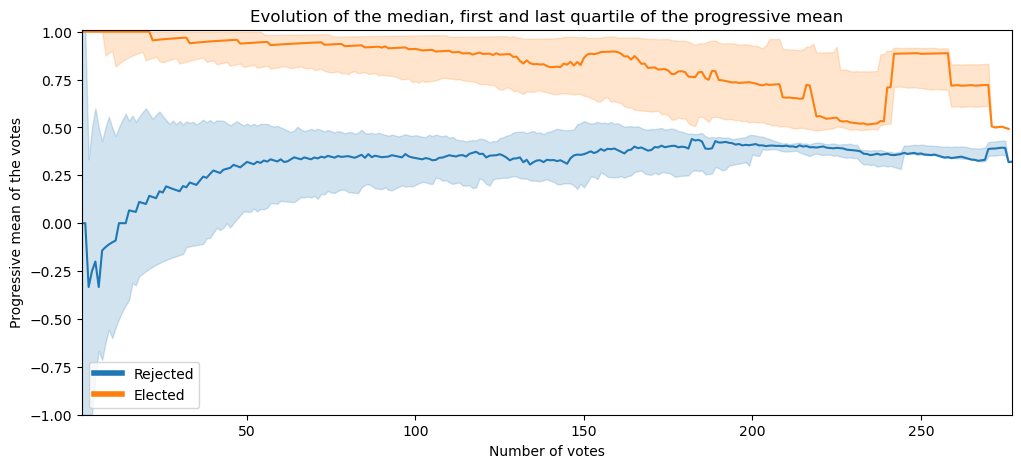

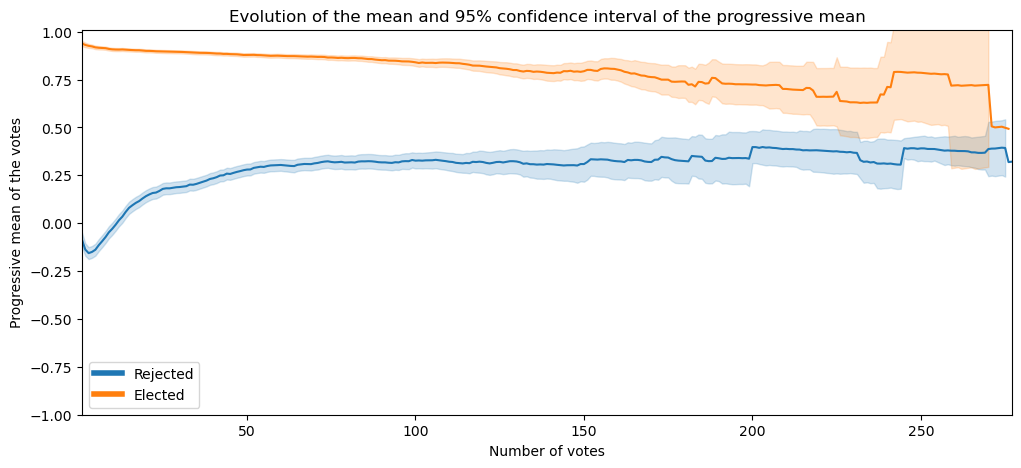

In [9]:
# Plot the evolution of the median, first and last quartile of the progressive mean
ax = plot_vote_evolution(quartiles, 'Vote_number')
ax.set_title('Evolution of the median, first and last quartile of the progressive mean')
plt.savefig('Figures/median_quartiles_over_n_votes.png')
plt.show()

# Plot the evolution of the mean and 95% confidence interval of the progressive mean
ax = plot_vote_evolution(sem, 'Vote_number')
ax.set_title('Evolution of the mean and 95% confidence interval of the progressive mean')
plt.savefig('Figures/mean_ci_over_n_votes.png')
plt.show()

#### Scatter plots and density

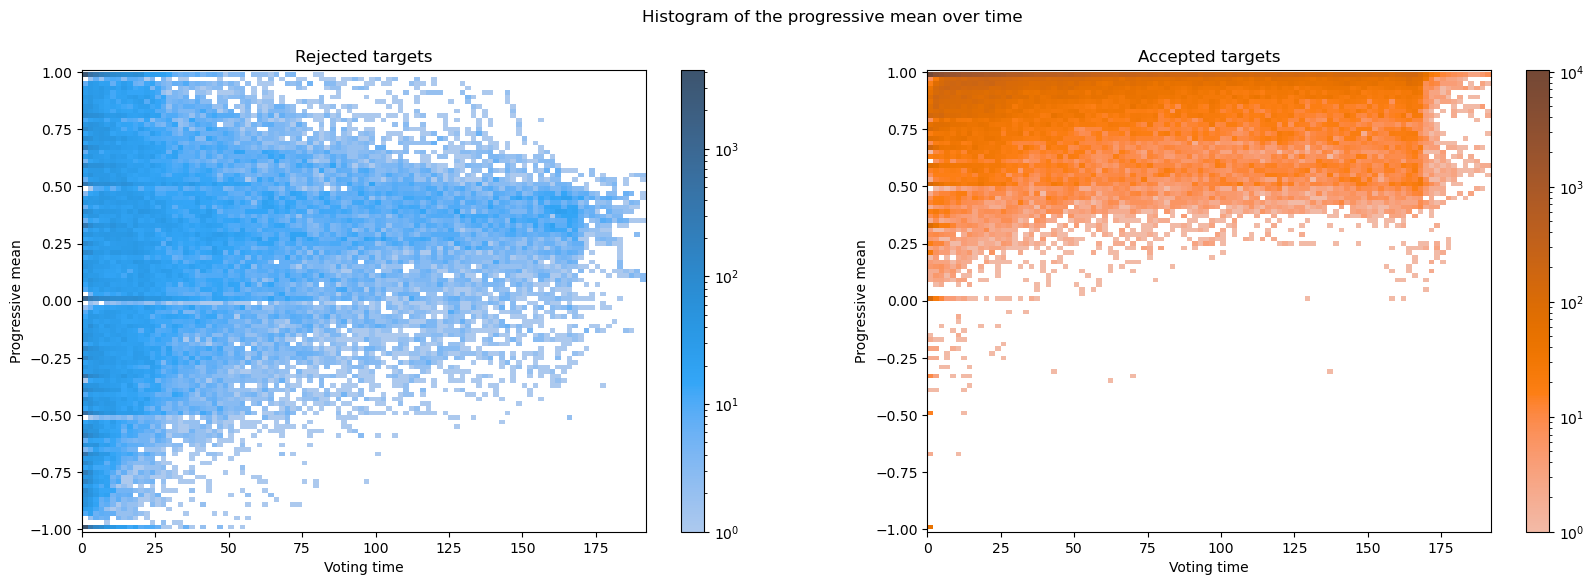

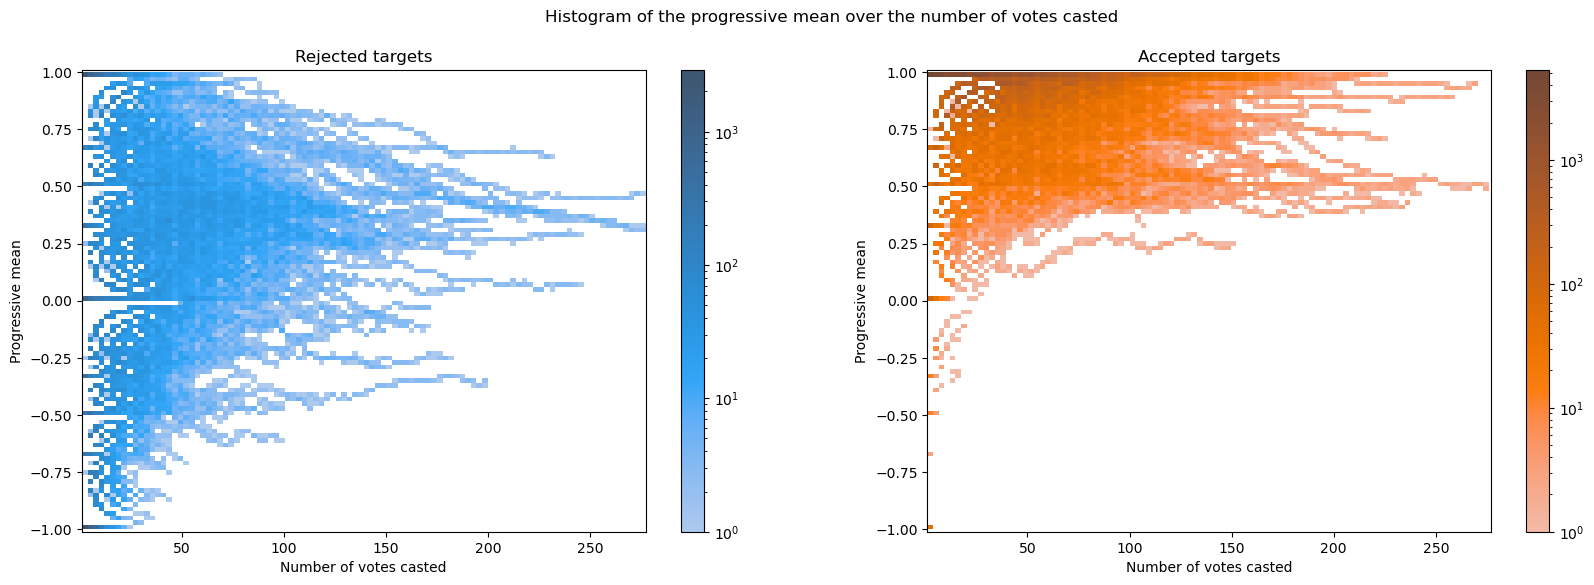

In [10]:
plot_time_distribution(df_vote_evolution, 'Voting_time')
plot_time_distribution(df_vote_evolution, 'Vote_number')

# Prediction of the results based on early votes

In [11]:
if False: # Takes a 40 minutes to run
    # Predict the result for each target with the first 5, 10, 15, ..., 50 votes using a gradient boosting classifier and cross validation to evaluate the performance
    nb_first_votes = np.concatenate((np.arange(1,5), np.arange(5, 71, 5)))
    scores = early_vote_prediction(df_vote_evolution, nb_first_votes, 10)
    # Save the results
    scores.to_csv('scores.csv', index=False)

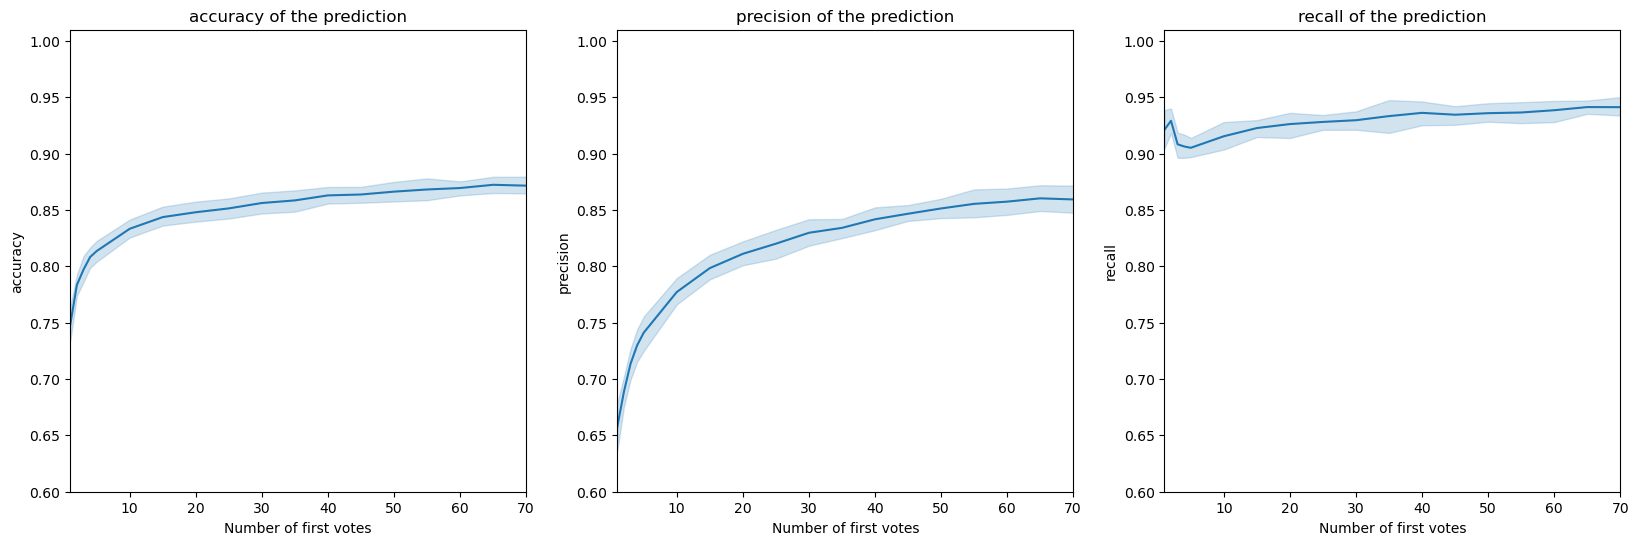

In [12]:
scores = pd.read_csv('scores.csv')
plot_prediction_scores(scores)

# Analysis of the sources

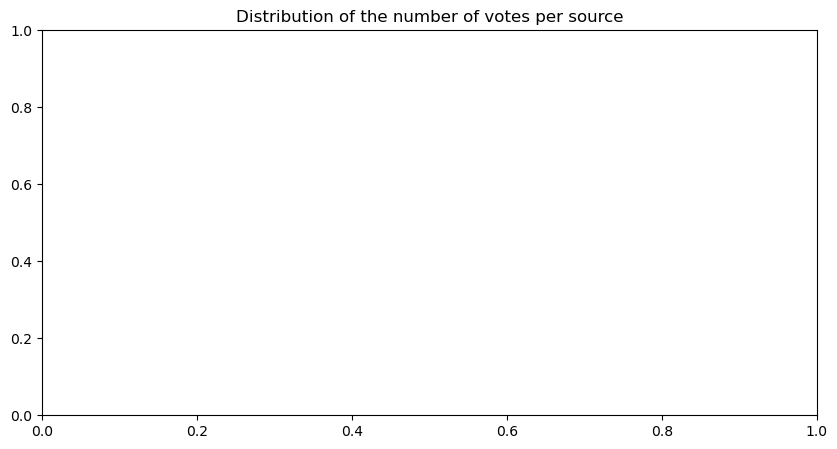

In [13]:
# Distribution of the number of votes per source (histogram)
def plot_vote_distribution(df, col):
    plt.figure(figsize=(10, 5))
    plt.title('Distribution of the number of votes per source')
    plt.show()    
plot_vote_distribution(df, 'Source')

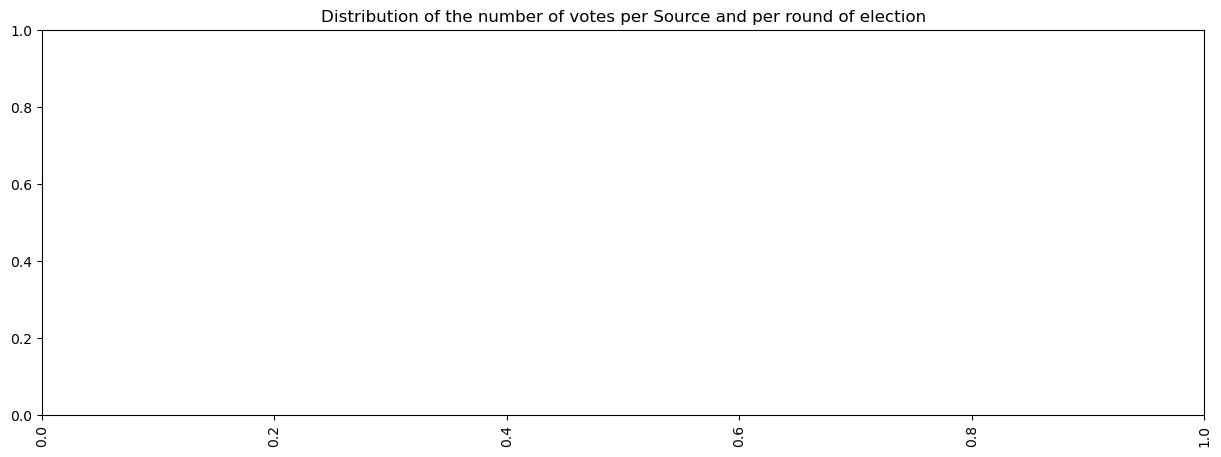

In [14]:
# Distribution of the number of votes per source and per round of election
def plot_vote_distribution_by_round(df, col):
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=90)
    plt.title('Distribution of the number of votes per ' + col + ' and per round of election')
    plt.show()

plot_vote_distribution_by_round(df, 'Source')